Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

Simulate random data for network latency

In [11]:
# Define the number of nodes and the number of samples
num_nodes = 10
num_samples = 1000

# Generate random latencies (in milliseconds) for routes between nodes
latencies = np.random.exponential(scale=50, size=(num_nodes, num_nodes, num_samples))

# Ensure no self-loops (latency from a node to itself is 0)
for i in range(num_nodes):
    latencies[i, i, :] = 0

latencies.shape

(10, 10, 1000)

Analyze latency distribution using additional NumPy methods

In [3]:
# Calculate the average latency for each route
average_latencies = np.mean(latencies, axis=2)

# Calculate the overall average latency
overall_average_latency = np.mean(average_latencies)

# Calculate the median latency for each route
median_latencies = np.median(latencies, axis=2)

# Calculate the standard deviation of latency for each route
std_latencies = np.std(latencies, axis=2)

# Identify high-latency routes (e.g., those with average latency above a certain threshold)
threshold = 100  # Define a threshold for high latency
high_latency_routes = np.where(average_latencies > threshold)

# Print high-latency routes and their average latencies
for i, j in zip(*high_latency_routes):
    print(f"High latency route: Node {i} to Node {j} with average latency {average_latencies[i, j]:.2f} ms")

# Print overall average latency
print(f"Overall average latency: {overall_average_latency:.2f} ms")


Overall average latency: 44.82 ms


Perform additional statistical analysis

In [4]:
# Calculate the maximum latency for each route
max_latencies = np.max(latencies, axis=2)

# Calculate the minimum latency for each route
min_latencies = np.min(latencies, axis=2)

# Print a summary of statistical measures for a sample route
sample_route = (0, 1)
print(f"Route {sample_route[0]} to {sample_route[1]} - Statistics:")
print(f"Average Latency: {average_latencies[sample_route[0], sample_route[1]]:.2f} ms")
print(f"Median Latency: {median_latencies[sample_route[0], sample_route[1]]:.2f} ms")
print(f"Standard Deviation: {std_latencies[sample_route[0], sample_route[1]]:.2f} ms")
print(f"Maximum Latency: {max_latencies[sample_route[0], sample_route[1]]:.2f} ms")
print(f"Minimum Latency: {min_latencies[sample_route[0], sample_route[1]]:.2f} ms")


Route 0 to 1 - Statistics:
Average Latency: 51.76 ms
Median Latency: 36.57 ms
Standard Deviation: 52.35 ms
Maximum Latency: 372.09 ms
Minimum Latency: 0.16 ms


Visualize the enhanced analysis

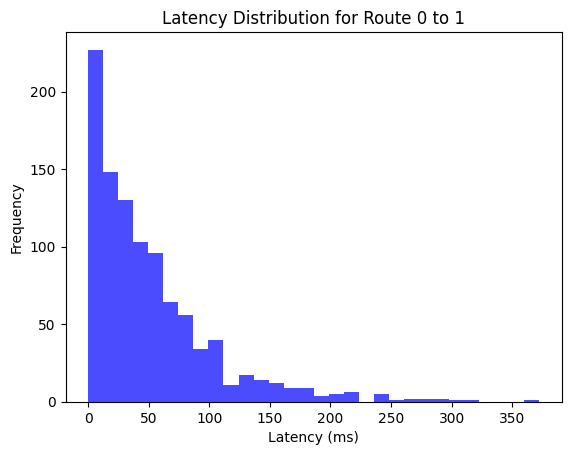

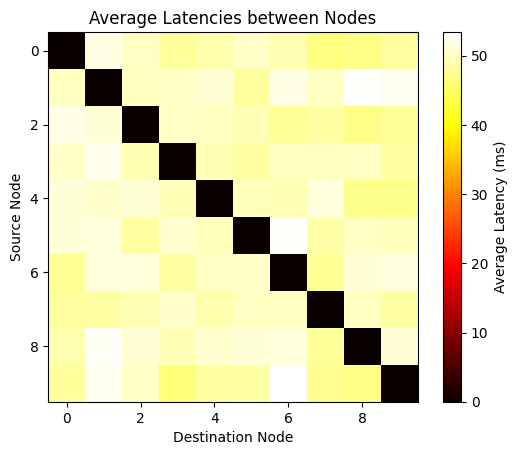

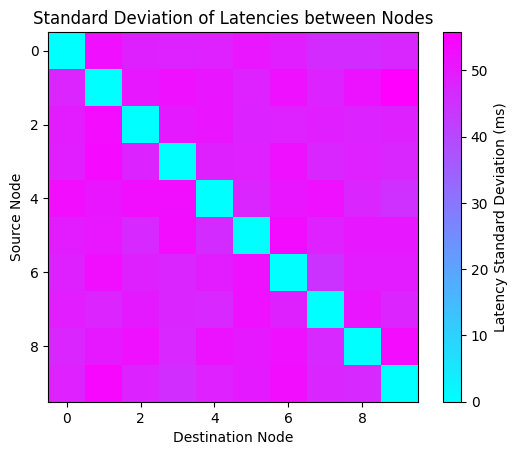

In [5]:
# Plot histogram of latencies for a sample route
plt.hist(latencies[sample_route[0], sample_route[1], :], bins=30, alpha=0.7, color='blue')
plt.title(f'Latency Distribution for Route {sample_route[0]} to {sample_route[1]}')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.show()

# Visualize the average latencies as a heatmap
plt.imshow(average_latencies, cmap='hot', interpolation='nearest')
plt.colorbar(label='Average Latency (ms)')
plt.title('Average Latencies between Nodes')
plt.xlabel('Destination Node')
plt.ylabel('Source Node')
plt.show()

# Visualize the standard deviation of latencies as a heatmap
plt.imshow(std_latencies, cmap='cool', interpolation='nearest')
plt.colorbar(label='Latency Standard Deviation (ms)')
plt.title('Standard Deviation of Latencies between Nodes')
plt.xlabel('Destination Node')
plt.ylabel('Source Node')
plt.show()
